<a href="https://colab.research.google.com/github/shinome551/MachineLearningSeminar/blob/main/Colab_and_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colaboratory

In [ ]:
## コードセル
import sys
print(sys.version)

3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


# テキストセル
ノートブックを公開する場合など、ドキュメントを添えたい時に便利
  
* セミナーでは使わなくてOK

In [ ]:
%%bash
pip list | grep -e "numpy" -e "matplotlib" -e "torch"

matplotlib                    3.2.2          
matplotlib-venn               0.11.6         
numpy                         1.18.5         
torch                         1.7.0+cu101    
torchsummary                  1.5.1          
torchtext                     0.3.1          
torchvision                   0.8.1+cu101    
torchviz                      0.0.1          


In [ ]:
%%bash
nvidia-smi -q | grep "Product Name" 

    Product Name                          : Tesla T4


# Pytorch

In [ ]:
import torch
torch.empty(size=(4,4))

tensor([[8.8350e-35, 0.0000e+00, 1.5134e-43, 1.4153e-43],
        [1.4433e-43, 1.3593e-43, 1.5134e-43, 4.4842e-44],
        [1.6115e-43, 1.4153e-43, 1.4153e-43, 1.4994e-43],
        [0.0000e+00, 2.1050e-10, 0.0000e+00, 0.0000e+00]])

In [ ]:
mat = torch.rand(1000,1000)
%timeit -n 1000 torch.matmul(mat.t(), mat)

1000 loops, best of 3: 25.7 ms per loop


In [ ]:
mat = torch.rand(1000,1000).to('cuda')
%timeit -n 1000 torch.matmul(mat.t(), mat)

1000 loops, best of 3: 298 µs per loop


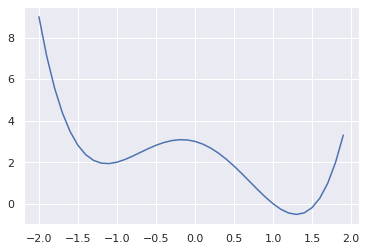

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def func(x):
    return x ** 4 - 3 * x ** 2 - x + 3

x = torch.arange(-2,2,0.1)
y = func(x)

plt.plot(x,y)
plt.show()

In [ ]:
x = torch.tensor([1.0], requires_grad=True)
y = func(x)
y.backward()
x.grad

tensor([-3.])

In [ ]:
%%bash
pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=1ba35a6f4455398167a7a91d23f12f8bad682830dd2526099e4d99e6b281502e
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


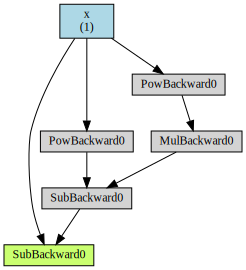

In [ ]:
from torchviz import make_dot
make_dot(y, params={'x': x})

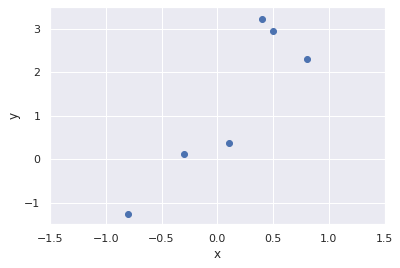

In [ ]:
x = torch.arange(-1, 1, 0.1)
x_sample = x[torch.randperm(len(x))[:6]]
f_x = 2 * x_sample + 1 
y = f_x + 0.7 * torch.randn_like(f_x)

plt.scatter(x_sample, y)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1.5, 3.5)
plt.xlim(-1.5, 1.5)
plt.show()

In [ ]:
w = torch.randn(2, requires_grad=True)
lr = 0.1
loss_list = []
w_list = [w.data.tolist()]
for i in range(100):
    f_w = w[1] * x_sample + w[0]
    loss = torch.mean((y - f_w) ** 2)
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad
    w.grad.zero_()
    w_list.append(w.data.tolist())
    loss_list.append(loss.item())
    if len(loss_list) > 1 and abs(loss_list[-1] - loss_list[-2]) < 0.01:
        print(f"iter:{i}, weight:{w.data.tolist()}, loss:{loss_list[-1]}")
        break

iter:20, weight:[1.042385220527649, 2.2587053775787354], loss:0.620783269405365


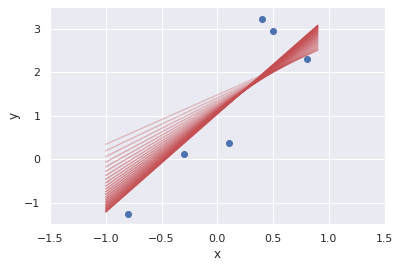

In [ ]:
plt.scatter(x_sample, y)
for i in range(len(w_list)):
    plt.plot(x, w_list[i][1]*x+w_list[i][0], alpha=0.3+(0.7*i/len(w_list)), color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1.5, 3.5)
plt.xlim(-1.5, 1.5)
plt.show()

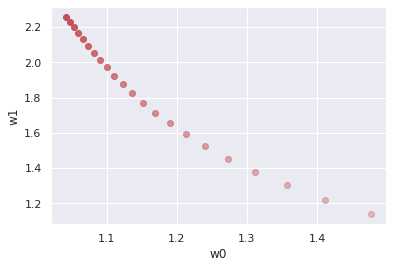

In [ ]:
for i in range(len(w_list)):
    plt.scatter(w_list[i][0], w_list[i][1], alpha=0.3+(0.7*(i+1)/len(w_list)), color='r')
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()